In [1]:
import numpy as np #for using numpy operations and creating np arrays

In [2]:
import os #for reading files in the folder
path="20_newsgroups" #path of the folder
folderlist=os.listdir(path) #adding the path to folderlist

In [3]:
x = [] #list that contains the name of files
y = [] #list that contains the name of folder

for foldername in folderlist:
    n_path=path+ '/' + foldername #path to get to the files
    filelist=os.listdir(n_path) #adding the path to the filelist
    print(foldername) #printing the name to check which folder is being traversed
    for filename in filelist: 
        x.append(filename) #adding the file name to x
        y.append(foldername) #adding folder name to y
        

from sklearn.model_selection import train_test_split #for splitting the data to test and train data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0) #splits the x and y list obtained above to training and testing data
len(x_train) #length of the training data

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


14997

In [4]:
from nltk.corpus import stopwords #used to obtain a list of stopwords
#stop word list
stopWords = set(stopwords.words('english')) 
len(stopWords)   #length of the stop words

179

In [5]:
#removing punctuations from the word
from string import punctuation
def removePunctuation(word): #function to remove punctuation from the word 
    for p in punctuation:
        word = word.replace(p,'') #replace the punctuation by blank''
        
    return word

In [6]:
vocabulary = {} #creating an empty vocabulary for the documents
for i in range(len(x_train)):
    pathFinal = '20_newsgroups' + '/' + y_train[i] + '/' + x_train[i] #path for getting to a specific file in xtrain
    f = open(pathFinal,'r',errors='ignore') #opening the file
    record = f.read() #reading the file
    words=record.split() #splitting the text into sentences
    for word in words: #splitting into seperate words
        word = removePunctuation(word) #removing punctuation from the word
        if len(word) > 2: #only accepting words with length > 2
            if(word.lower() in stopWords): #if word is a stopword, the word is not added to the vocabulary
                continue;
            else:
                if word.lower() in vocabulary:
                    vocabulary[word.lower()]+=1 #if word already present in the vocab, incrementing it's count
                else:
                    vocabulary[word.lower()] = 1 #if word not present, adding it to the vocab
    f.close() #closing the file

In [7]:
#length of vocabulary
print("Length of Vocabulary:", len(vocabulary))
#now we need to reduce the size of the vocabulary 

Length of Vocabulary: 214979


In [8]:
#to reduce the size, we first need to find frequency of elements in dict to plot
freq = sorted(vocabulary.values()) #sorted frequency of the vocabulary
Y = set(freq) #unique values of frequency
y_list = list(Y) #converting a set into list

wordFreq = [] #empty list of word with a certain frequency
#finding num of words with frequency i
for i in y_list:
    wordFreq.append(sum(value == i for value in vocabulary.values())) 


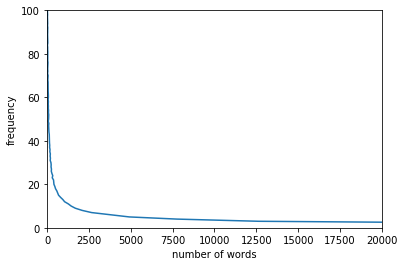

In [14]:
#plotting a graph to check the relationship between the frequency of words and the num of words with a certain frequency
import matplotlib.pyplot as plt
plt.axis([0,20000,0,100])
plt.plot(wordFreq,y_list)
plt.ylabel("frequency")
plt.xlabel("number of words")
plt.show()

In [10]:
selected_words = [] #empty list of selected words

#choosing the top 2000 words
import operator

sorted_vocab = sorted(vocabulary.items(), key=operator.itemgetter(1)) #sorting the vocabulary wrt the frequency
vocab_len = len(sorted_vocab) #length of the vocabulary
for i in range(vocab_len-1,vocab_len-2001,-1):
    selected_words.append(sorted_vocab[i][0]) #selecting the top 2000 words in the vocabulary
    
len(selected_words)

2000

In [76]:

data = np.ndarray(shape=(len(x_train),len(selected_words))) #numpy array for storing the frequency of words in all files
for i in range(len(x_train)):
    count = np.zeros(len(selected_words)) #empty list for variable count
    pathFinal = '20_newsgroups' + '/' + y_train[i] + '/' + x_train[i] #path to a certain folder in xtrain
    f = open(pathFinal,'r',errors='ignore') #opening the file
    record = f.read() #reading the file
    words=record.split() #splitting the file into words
    for word in words:
        
        word = removePunctuation(word) #removing punctuation from the word
        for j in range(len(selected_words)):
            col = 0
            if word.lower() == selected_words[j]: #if word is present in the vocabulary, increase it's count
                count[j] +=1 #increasing the count
                col = j 
                break
        data[i][col] = count[col] #adding the count to the final 2D numpy ARRAY
       
    print(count)
                

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 2. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 5. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 2. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[3. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[3. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[2. 2. 2. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[3. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 3. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 3. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[3. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 2. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 2. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 6. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 2.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[2. 2. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 3. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 3. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 1. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 3. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 1. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[2. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[5. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[6. 3. 5. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 3. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[3. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 1. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 4. ... 1. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 1. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 1. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[3. 1. 3. ... 8. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 2. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 1. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 1. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 4. ... 0.

[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[3. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 3. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[2. 1. 2. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 3. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[3. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 2. 2. ... 1. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 5. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[3. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 1. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 2. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 9. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 1. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[6. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[3. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[3. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[3. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

In [89]:
import pandas as pd #for creating dataframe
df = pd.DataFrame(data) #creating a dataframe from the data obtained above
df.columns = selected_words

In [90]:
df.describe() #describing the content of the dataframe

,subject,lines,date,newsgroups,path,messageid,apr,organization,gmt,would,...,sandviknewtonapplecom,bay,sleep,structure,matt,tear,sig,explanation,auto,sending
count,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,...,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000
mean,1.081816,1.044409,1.037407,1.019804,1.016603,1.003601,0.985797,0.984864,0.887177,0.792492,...,0.012736,0.012736,0.012736,0.012736,0.012669,0.012669,0.012669,0.012669,0.012669,0.012669
std,0.822327,0.369592,0.307071,0.228521,0.228776,0.066244,0.454958,0.285644,0.426445,1.618368,...,0.157198,0.222526,0.261131,0.159723,0.160353,0.171602,0.121010,0.150041,0.162008,0.141344
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50.000000,16.000000,13.000000,15.000000,16.000000,3.000000,17.000000,6.000000,4.000000,32.000000,...,3.000000,21.000000,16.000000,7.000000,8.000000,6.000000,3.000000,8.000000,7.000000,5.000000


In [93]:
df["y"] = y_train #adding the result to the dataframe
df.head()

,subject,lines,date,newsgroups,path,messageid,apr,organization,gmt,would,...,bay,sleep,structure,matt,tear,sig,explanation,auto,sending,y
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,talk.politics.misc
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,talk.religion.misc
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sci.electronics
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,misc.forsale
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sci.electronics


In [94]:
#testing data
#redoing the same process for testing data to create a testing dataframe
data = np.ndarray(shape=(len(x_test),len(selected_words)))
for i in range(len(x_test)):
    count = np.zeros(len(selected_words)) #empty list for variable count
    pathFinal = '20_newsgroups' + '/' + y_test[i] + '/' + x_test[i]
    f = open(pathFinal,'r',errors='ignore')
    record = f.read()
    words=record.split()
    for word in words:
        
        word = removePunctuation(word)
        for j in range(len(selected_words)):
            col = 0
            if word.lower() == selected_words[j]:
                count[j] +=1
                col = j
                break
        data[i][col] = count[col]
   # data[i].append(count) #appending the row to the final data            
    print(count)

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 3. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 1. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 2. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 3. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[3. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 2. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[6. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 4. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 1.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 1. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[4. 2. 2. ... 0. 0. 5.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[2. 2. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[3. 1. 3. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[4. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 3. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 3. ... 0. 0. 0.]
[1. 1. 2. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 9. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 1. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 1. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 2. ... 2. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 2. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0.

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[ 1. 14.  1. ...  0.  0.  0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 2. 2. ... 0. 0. 0.]
[3. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 2. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 2. 2. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
[2. 2. 1. 

In [96]:
df_test = pd.DataFrame(data) #dataframe for testing data
df_test.columns = selected_words
df_test["y"] = y_test #adding result column to the dataframe
df_test.head()

,subject,lines,date,newsgroups,path,messageid,apr,organization,gmt,would,...,bay,sleep,structure,matt,tear,sig,explanation,auto,sending,y
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comp.windows.x
1,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sci.med
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,talk.politics.guns
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,misc.forsale
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rec.sport.hockey


In [97]:
df_test.describe()

,subject,lines,date,newsgroups,path,messageid,apr,organization,gmt,would,...,sandviknewtonapplecom,bay,sleep,structure,matt,tear,sig,explanation,auto,sending
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.06880,1.042200,1.034800,1.024600,1.014600,1.00600,0.968000,0.996200,0.89060,0.813200,...,0.009800,0.009200,0.009600,0.014000,0.010200,0.009800,0.011400,0.012800,0.013000,0.012200
std,0.61947,0.344736,0.243312,0.245778,0.144191,0.09983,0.442962,0.339129,0.41505,1.660138,...,0.131558,0.112774,0.121288,0.201524,0.140356,0.148689,0.111681,0.132059,0.151114,0.134368
min,1.00000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40.00000,14.000000,7.000000,12.000000,6.000000,4.00000,16.000000,8.000000,3.00000,36.000000,...,3.000000,3.000000,3.000000,11.000000,5.000000,7.000000,2.000000,3.000000,5.000000,5.000000


In [98]:
df.to_csv("train.csv") #saving the training data in train.csv
df_test.to_csv("test.csv") #saving testing data in test.csv